<a href="https://colab.research.google.com/github/white1107/Math_OCR/blob/main/MOCR_1_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pylatex
!sudo apt-get install latexmk
!pip install folium==0.2.1
!pip install pdflatex
!sudo apt-get install texlive-latex-recommended 
!sudo apt install texlive-latex-extra
!sudo apt install dvipng
!apt-get install poppler-utils
!pip install pdf2image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
latexmk is already the newest version (1:4.41-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
texlive-latex-recommended is already the newest version (2017.20180305-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove

In [2]:
!mkdir image_file
!mkdir result_file
# add Attention.pdf

mkdir: cannot create directory ‘image_file’: File exists
mkdir: cannot create directory ‘result_file’: File exists


In [3]:
import os
from pathlib import Path
from pdf2image import convert_from_path
from numpy import asarray
import numpy as np

In [4]:


# PDFファイルのパス
pdf_path = Path("./Attention.pdf")

# PDF -> Image に変換（150dpi）
pages = convert_from_path(str(pdf_path), 600)

# 画像ファイルを１ページずつ保存
image_dir = Path("./image_file")
for i, page in enumerate(pages):
    file_name = pdf_path.stem + "_{:02d}".format(i + 1) + ".jpeg"
    image_path = image_dir / file_name
    # JPEGで保存
    page.save(str(image_path), "JPEG")

In [5]:
from PIL import Image 
image_file = Image.open("./image_file/Attention_03.jpeg") # open colour image
image_file = image_file.convert('L') # convert image to black and white

In [6]:
data = np.array(image_file)
original = data.copy()
data_lined = data.copy()

In [7]:
ver = []
zero_ind = []
tmp_ind = []
f = 0
max_score = len(data_lined[0])
t = 0
for i in range(len(data_lined)):
  score = np.count_nonzero(data_lined[i])
  ver.append(score)
  if score==max_score and f==0:
    zero_ind.append(i)
    f = 1
  elif score!=max_score and f==1:
    zero_ind.append(i-1)
    f = 0

ver_h = []
zero_ind_h = []
tmp_ind = []
f = 0
max_score = len(data_lined[:,0])
t = 0
for i in range(len(data_lined[0])):
  score = np.count_nonzero(data_lined[:,i])
  ver_h.append(score)
  if score==max_score and f==0:
    zero_ind_h.append(i)
    f = 1
  elif score!=max_score and f==1:
    zero_ind_h.append(i-1)
    f = 0

    

In [8]:
target = []
x1 = 0
x2 = len(data[0])
for i in zero_ind_h:
  if i == 0 or i == len(data[0]):
    continue
  elif x1==0:
    x1 = i
  else: x2 = i 
for i,j in zip(zero_ind,zero_ind[1:]):
  if j-i<= 20:continue
  else:target.append([i,j,x1,x2])
# print(target)

In [9]:
for i in zero_ind:
  data_lined[i] = 0
for i in zero_ind_h:
  data_lined[:,i] = 0

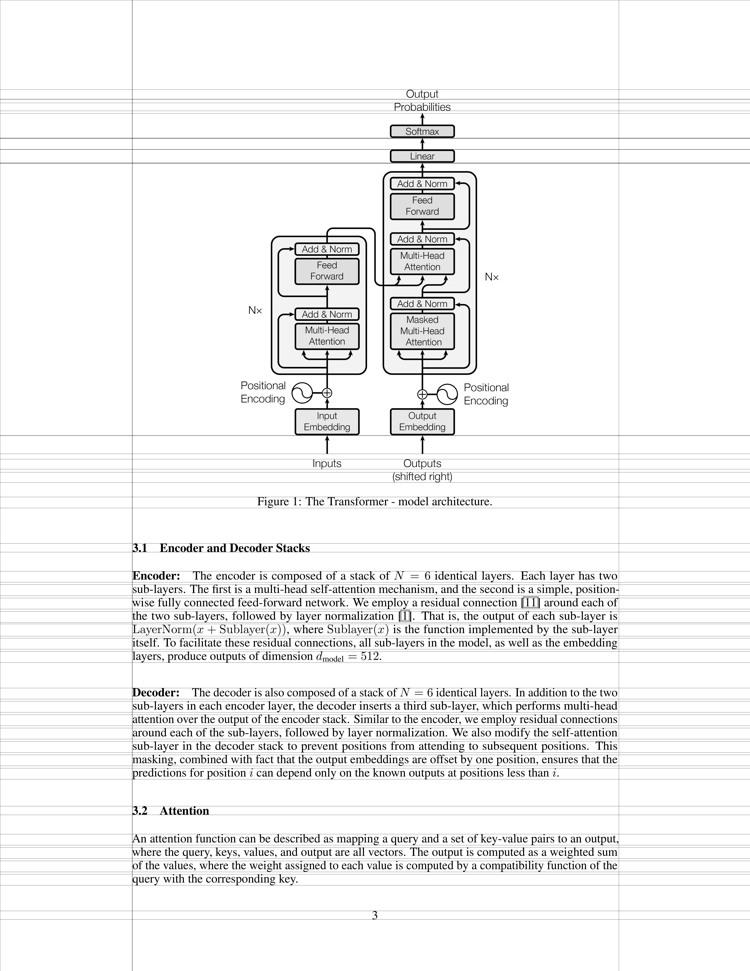

In [10]:
# アスペクト比を固定して、幅が指定した値になるようリサイズする。
def scale_to_width(img, width):
    height = round(img.height * width / img.width)
    return img.resize((width, height))


pil_image = Image.fromarray(data_lined)
pil_image = scale_to_width(pil_image, 750)

pil_image

In [11]:
data = data_lined.copy()

print(len(target),target)
for y1,y2,x1,x2 in target:
  test_line = data[y1:y2,x1:x2]
  ver_h = []
  zero_ind_h = []
  tmp_ind = []
  f = 0
  max_score = len(test_line[:,0])
  freedom =1
  t = 0
  for i in range(len(test_line[0])):
    score = np.count_nonzero(test_line[:,i])
    ver_h.append(score)
    if score>= max_score - freedom  and f==0:
      tmp_ind.append(i)
      f = 1
    elif score < max_score - freedom and f==1:
      zero_ind_h.append([tmp_ind[-1],i,i-tmp_ind[-1]])
      f = 0
  if f:
      zero_ind_h.append([tmp_ind[-1],i,i-tmp_ind[-1]])

  for i,j,g in zero_ind_h:
    if g > 15:
      if g>= 50:
        test_line[:,i] = 0
        test_line[:,j] = 0
      else:
        test_line[:,(j+i)//2] = 0


42 [[0, 609, 898, 4208], [609, 673, 898, 4208], [677, 699, 898, 4208], [699, 753, 898, 4208], [771, 937, 898, 4208], [942, 1015, 898, 4208], [1016, 1106, 898, 4208], [1111, 2959, 898, 4208], [2962, 3085, 898, 4208], [3085, 3121, 898, 4208], [3121, 3189, 898, 4208], [3189, 3210, 898, 4208], [3210, 3279, 898, 4208], [3279, 3378, 898, 4208], [3378, 3453, 898, 4208], [3453, 3694, 898, 4208], [3694, 3753, 898, 4208], [3753, 3883, 898, 4208], [3883, 3958, 898, 4208], [3974, 4049, 898, 4208], [4065, 4140, 898, 4208], [4156, 4231, 898, 4208], [4241, 4324, 898, 4208], [4338, 4413, 898, 4208], [4428, 4504, 898, 4208], [4504, 4677, 898, 4208], [4677, 4752, 898, 4208], [4767, 4842, 898, 4208], [4858, 4933, 898, 4208], [4949, 5024, 898, 4208], [5040, 5115, 898, 4208], [5131, 5206, 898, 4208], [5222, 5297, 898, 4208], [5297, 5480, 898, 4208], [5480, 5539, 898, 4208], [5539, 5670, 898, 4208], [5670, 5745, 898, 4208], [5761, 5836, 898, 4208], [5852, 5927, 898, 4208], [5943, 6018, 898, 4208], [6018, 61

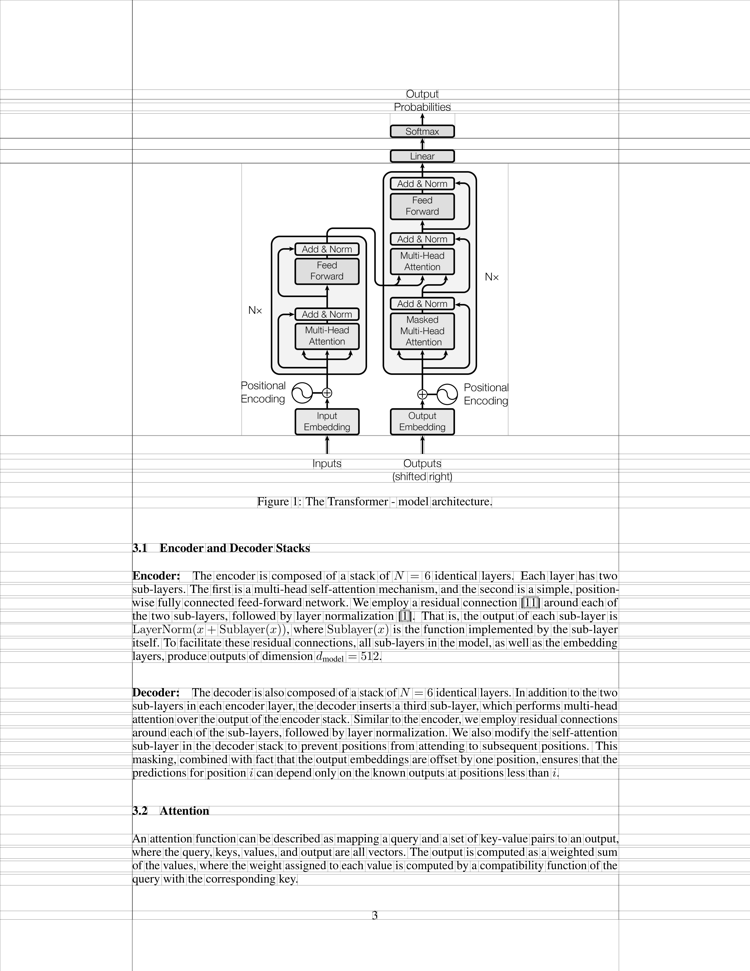

In [12]:
pil_image = Image.fromarray(data)
pil_image = scale_to_width(pil_image, 750)
pil_image

In [13]:
data1 = data.copy()
data2 = data.copy()
data3 = data.copy()

im_rgb = np.concatenate((data1,data2,data3),axis = 1)

In [14]:
im_rgb.shape

(6601, 15300)

In [15]:
pil_image = Image.fromarray(im_rgb)
# pil_image = pil_image.resize((3300,7650))

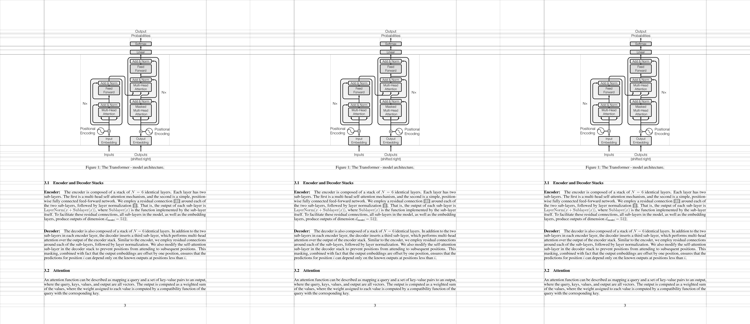

In [16]:
pil_image = scale_to_width(pil_image, 750)

pil_image

In [17]:
from PIL import Image 
image_file1 = Image.open("./image_file/Attention_02.jpeg") # open colour image
image_file1 = image_file1.convert('L') # convert image to black and white
image_file2 = Image.open("./image_file/Attention_03.jpeg") # open colour image
image_file2 = image_file2.convert('L') # convert image to black and white
image_file3 = Image.open("./image_file/Attention_04.jpeg") # open colour image
image_file3 = image_file3.convert('L') # convert image to black and white
image_file4 = Image.open("./image_file/Attention_05.jpeg") # open colour image
image_file4 = image_file4.convert('L') # convert image to black and white
image_file5 = Image.open("./image_file/Attention_06.jpeg") # open colour image
image_file5 = image_file5.convert('L') # convert image to black and white
image_file6 = Image.open("./image_file/Attention_07.jpeg") # open colour image
image_file6 = image_file6.convert('L') # convert image to black and white
image_file7 = Image.open("./image_file/Attention_08.jpeg") # open colour image
image_file7 = image_file7.convert('L') # convert image to black and white
image_file8 = Image.open("./image_file/Attention_09.jpeg") # open colour image
image_file8 = image_file8.convert('L') # convert image to black and white
image_file9 = Image.open("./image_file/Attention_10.jpeg") # open colour image
image_file9 = image_file9.convert('L') # convert image to black and white

In [18]:
def line2(image_file):  
  data = np.array(image_file)
  original = data.copy()
  data_lined = data.copy()

  ver = []
  zero_ind = []
  tmp_ind = []
  f = 0
  max_score = len(data_lined[0])
  t = 0
  for i in range(len(data_lined)):
    score = np.count_nonzero(data_lined[i])
    ver.append(score)
    if score==max_score and f==0:
      zero_ind.append(i)
      f = 1
    elif score!=max_score and f==1:
      zero_ind.append(i-1)
      f = 0

  ver_h = []
  zero_ind_h = []
  tmp_ind = []
  f = 0
  max_score = len(data_lined[:,0])
  t = 0
  for i in range(len(data_lined[0])):
    score = np.count_nonzero(data_lined[:,i])
    ver_h.append(score)
    if score==max_score and f==0:
      zero_ind_h.append(i)
      f = 1
    elif score!=max_score and f==1:
      zero_ind_h.append(i-1)
      f = 0

      
  target = []
  x1 = 0
  x2 = len(data[0])
  for i in zero_ind_h:
    if i == 0 or i == len(data[0]):
      continue
    elif x1==0:
      x1 = i
    else: x2 = i 
  for i,j in zip(zero_ind,zero_ind[1:]):
    if j-i<= 20:continue
    else:target.append([i,j,x1,x2])
  # print(target)


  for i in zero_ind:
    data_lined[i] = 0
  for i in zero_ind_h:
    data_lined[:,i] = 0


  data = data_lined.copy()

  print(len(target),target)
  for y1,y2,x1,x2 in target:
    test_line = data[y1:y2,x1:x2]
    ver_h = []
    zero_ind_h = []
    tmp_ind = []
    f = 0
    max_score = len(test_line[:,0])
    freedom =1
    t = 0
    for i in range(len(test_line[0])):
      score = np.count_nonzero(test_line[:,i])
      ver_h.append(score)
      if score>= max_score - freedom  and f==0:
        tmp_ind.append(i)
        f = 1
      elif score < max_score - freedom and f==1:
        zero_ind_h.append([tmp_ind[-1],i,i-tmp_ind[-1]])
        f = 0
    if f:
        zero_ind_h.append([tmp_ind[-1],i,i-tmp_ind[-1]])

    for i,j,g in zero_ind_h:
      if g > 15:
        if g>= 50:
          test_line[:,i] = 0
          test_line[:,j] = 0
        else:
          test_line[:,(j+i)//2] = 0
  return data

In [19]:
data1 = line2(image_file1)
data2 = line2(image_file2)
data3 = line2(image_file3)


63 [[0, 626, 898, 4209], [626, 701, 898, 4209], [716, 791, 898, 4209], [807, 877, 898, 4209], [877, 944, 898, 4209], [944, 1019, 898, 4209], [1035, 1110, 898, 4209], [1125, 1201, 898, 4209], [1217, 1292, 898, 4209], [1308, 1383, 898, 4209], [1398, 1473, 898, 4209], [1489, 1564, 898, 4209], [1580, 1655, 898, 4209], [1655, 1717, 898, 4209], [1717, 1792, 898, 4209], [1808, 1883, 898, 4209], [1899, 1974, 898, 4209], [1990, 2065, 898, 4209], [2065, 2126, 898, 4209], [2126, 2201, 898, 4209], [2217, 2292, 898, 4209], [2308, 2383, 898, 4209], [2399, 2474, 898, 4209], [2474, 2667, 898, 4209], [2667, 2756, 898, 4209], [2756, 2898, 898, 4209], [2898, 2973, 898, 4209], [2988, 3062, 898, 4209], [3079, 3154, 898, 4209], [3170, 3245, 898, 4209], [3261, 3336, 898, 4209], [3352, 3427, 898, 4209], [3443, 3518, 898, 4209], [3534, 3609, 898, 4209], [3625, 3682, 898, 4209], [3682, 3761, 898, 4209], [3761, 3836, 898, 4209], [3852, 3927, 898, 4209], [3943, 4018, 898, 4209], [4034, 4109, 898, 4209], [4109, 41

In [20]:

im_rgb = np.concatenate((data1,data2,data3),axis = 1)

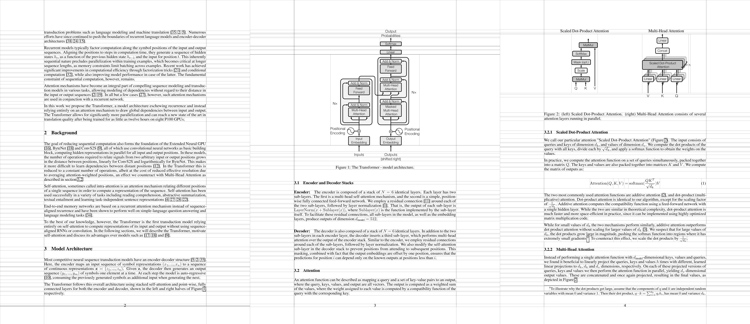

In [21]:
pil_image = Image.fromarray(im_rgb)
pil_image = scale_to_width(pil_image, 750)
pil_image

In [22]:
def line_seg(data_image):

# def line2(image_file):  
  data = np.array(data_image)
  original = data.copy()
  data_lined = data.copy()

  ver = []
  zero_ind = []
  tmp_ind = []
  f = 0
  max_score = len(data_lined[0])
  t = 0
  for i in range(len(data_lined)):
    score = np.count_nonzero(data_lined[i])
    ver.append(score)
    if score==max_score and f==0:
      zero_ind.append(i)
      f = 1
    elif score!=max_score and f==1:
      zero_ind.append(i-1)
      f = 0

  ver_h = []
  zero_ind_h = []
  tmp_ind = []
  f = 0
  max_score = len(data_lined[:,0])
  t = 0
  for i in range(len(data_lined[0])):
    score = np.count_nonzero(data_lined[:,i])
    ver_h.append(score)
    if score==max_score and f==0:
      zero_ind_h.append(i)
      f = 1
    elif score!=max_score and f==1:
      zero_ind_h.append(i-1)
      f = 0

      
  target = []
  x1 = 0
  x2 = len(data[0])
  for i in zero_ind_h:
    if i == 0 or i == len(data[0]):
      continue
    elif x1==0:
      x1 = i
    else: x2 = i 
  for i,j in zip(zero_ind,zero_ind[1:]):
    if j-i<= 20:continue
    else:target.append([i,j,x1,x2])
  # print(target)


  for i in zero_ind:
    data_lined[i] = 0
  for i in zero_ind_h:
    data_lined[:,i] = 0


  data = data_lined.copy()

  print(len(target),target)
  for y1,y2,x1,x2 in target:
    test_line = data[y1:y2,x1:x2]
    ver_h = []
    zero_ind_h = []
    tmp_ind = []
    f = 0
    max_score = len(test_line[:,0])
    freedom =1
    t = 0
    for i in range(len(test_line[0])):
      score = np.count_nonzero(test_line[:,i])
      ver_h.append(score)
      if score>= max_score - freedom  and f==0:
        tmp_ind.append(i)
        f = 1
      elif score < max_score - freedom and f==1:
        zero_ind_h.append([tmp_ind[-1],i,i-tmp_ind[-1]])
        f = 0
    if f:
        zero_ind_h.append([tmp_ind[-1],i,i-tmp_ind[-1]])

    for i,j,g in zero_ind_h:
      if g > 15:
        if g>= 50:
          test_line[:,i] = 0
          test_line[:,j] = 0
        else:
          test_line[:,(j+i)//2] = 0
  # return data



  original = np.array(data_image)
  pil_image = Image.fromarray(data)
  data_image_rgb = pil_image.convert("RGB")
  data = original.copy()
  rgb_data = np.array(data_image_rgb)

  red_target = []
  for y1,y2,x1,x2 in target:
    test_line = data[y1:y2,x1:x2]
    ver_h = []
    zero_ind_h = []
    tmp_ind = []
    f = 0
    max_score = len(test_line[:,0])
    freedom =1
    t = 0
    for i in range(len(test_line[0])):
      score = np.count_nonzero(test_line[:,i])
      ver_h.append(score)
      if score>= max_score - freedom  and f==0:
        tmp_ind.append(i)
        f = 1
      elif score < max_score - freedom and f==1:
        zero_ind_h.append([tmp_ind[-1],i,i-tmp_ind[-1]])
        f = 0
    if f:
        zero_ind_h.append([tmp_ind[-1],i,i-tmp_ind[-1]])

    for i,j,g in zero_ind_h:
      if g > 15:
        if g>= 50:
          test_line[:,i] = 0
          test_line[:,j] = 0
          red_target.append([y1,y2,x1,x2,i])
          red_target.append([y1,y2,x1,x2,j])
        else:
          test_line[:,(j+i)//2] = 0
          red_target.append([y1,y2,x1,x2,(j+i)//2])

  data = original.copy()
  r_data = rgb_data.copy()
  target_dic = []
  for i,j in zip(red_target,red_target[1:]):
    if i[:-1] == j[:-1]:
      if np.mean(data[i[0]:i[1],i[2]+i[-1]:i[2]+j[-1]]) <= 253: r_data[i[0]:i[1],i[2]+i[-1]:i[2]+j[-1],(1,2)] = 0 ; target_dic.append([i[0],i[1],i[2]+i[-1],i[2]+j[-1]])
      # else:r_data[i[0]:i[1],i[2]+i[-1]:i[2]+j[-1],(0,1)] = 0
    else:
      if np.mean(data[i[0]:i[1],i[2]+i[-1]:i[3]]) <= 253: r_data[i[0]:i[1],i[2]+i[-1]:i[3],(1,2)] = 0 ; target_dic.append([i[0],i[1],i[2]+i[-1],i[3]])
      # else: r_data[i[0]:i[1],i[2]+i[-1]:i[3],(0,2)] = 0

      if np.mean(data[j[0]:j[1],j[2]:j[2]+j[-1]]) <= 253: r_data[j[0]:j[1],j[2]:j[2]+j[-1],(1,2)] = 0 ; target_dic.append([j[0],j[1],j[2],j[2]+j[-1]])
      # else :r_data[j[0]:j[1],j[2]:j[2]+j[-1],(0,2)] = 0
  return r_data

In [23]:
image_file3 = Image.open("./image_file/Attention_04.jpeg") # open colour image
image_file3 = image_file3.convert('L') # convert image to black and white

data4 = line_seg(image_file1)

63 [[0, 626, 898, 4209], [626, 701, 898, 4209], [716, 791, 898, 4209], [807, 877, 898, 4209], [877, 944, 898, 4209], [944, 1019, 898, 4209], [1035, 1110, 898, 4209], [1125, 1201, 898, 4209], [1217, 1292, 898, 4209], [1308, 1383, 898, 4209], [1398, 1473, 898, 4209], [1489, 1564, 898, 4209], [1580, 1655, 898, 4209], [1655, 1717, 898, 4209], [1717, 1792, 898, 4209], [1808, 1883, 898, 4209], [1899, 1974, 898, 4209], [1990, 2065, 898, 4209], [2065, 2126, 898, 4209], [2126, 2201, 898, 4209], [2217, 2292, 898, 4209], [2308, 2383, 898, 4209], [2399, 2474, 898, 4209], [2474, 2667, 898, 4209], [2667, 2756, 898, 4209], [2756, 2898, 898, 4209], [2898, 2973, 898, 4209], [2988, 3062, 898, 4209], [3079, 3154, 898, 4209], [3170, 3245, 898, 4209], [3261, 3336, 898, 4209], [3352, 3427, 898, 4209], [3443, 3518, 898, 4209], [3534, 3609, 898, 4209], [3625, 3682, 898, 4209], [3682, 3761, 898, 4209], [3761, 3836, 898, 4209], [3852, 3927, 898, 4209], [3943, 4018, 898, 4209], [4034, 4109, 898, 4209], [4109, 41

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


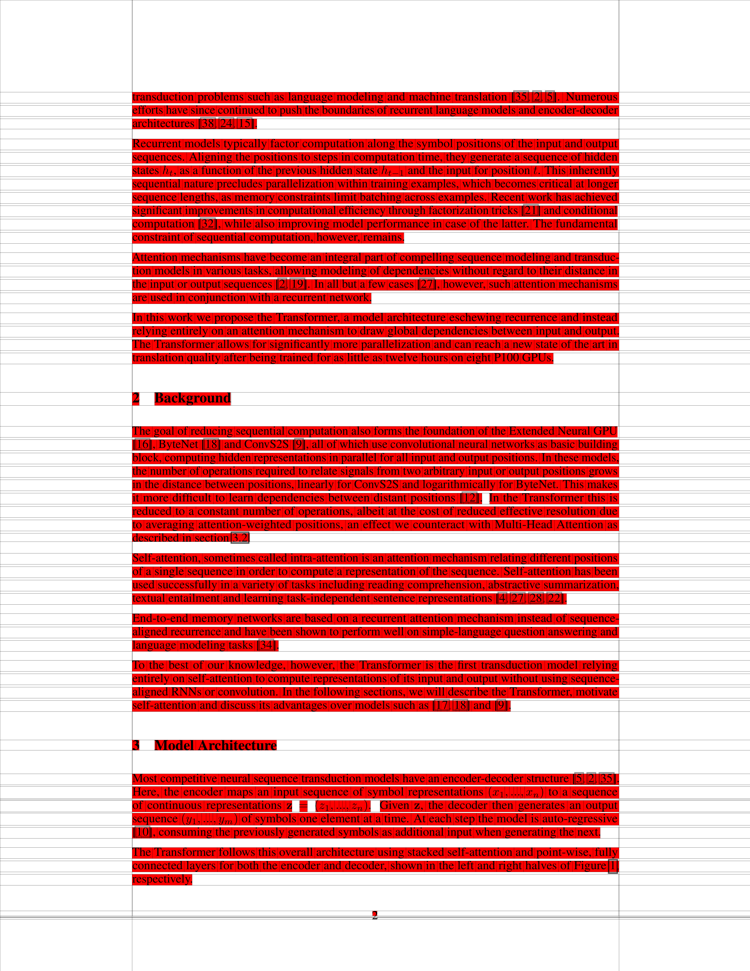

In [24]:
pil_image = Image.fromarray(data4)
pil_image = scale_to_width(pil_image, 750)

pil_image

In [25]:
def line_seg3(data_image):

# def line2(image_file):  
  data = np.array(data_image)
  original = data.copy()
  data_lined = data.copy()

  ver = []
  zero_ind = []
  tmp_ind = []
  f = 0
  max_score = len(data_lined[0])
  t = 0
  for i in range(len(data_lined)):
    score = np.count_nonzero(data_lined[i])
    ver.append(score)
    if score==max_score and f==0:
      zero_ind.append(i)
      f = 1
    elif score!=max_score and f==1:
      zero_ind.append(i-1)
      f = 0

  ver_h = []
  zero_ind_h = []
  tmp_ind = []
  f = 0
  max_score = len(data_lined[:,0])
  t = 0
  for i in range(len(data_lined[0])):
    score = np.count_nonzero(data_lined[:,i])
    ver_h.append(score)
    if score==max_score and f==0:
      zero_ind_h.append(i)
      f = 1
    elif score!=max_score and f==1:
      zero_ind_h.append(i-1)
      f = 0

      
  target = []
  x1 = 0
  x2 = len(data[0])
  for i in zero_ind_h:
    if i == 0 or i == len(data[0]):
      continue
    elif x1==0:
      x1 = i
    else: x2 = i 
  for i,j in zip(zero_ind,zero_ind[1:]):
    if j-i<= 20:continue
    else:target.append([i,j,x1,x2])
  # print(target)


  for i in zero_ind:
    data_lined[i] = 0
  for i in zero_ind_h:
    data_lined[:,i] = 0


  data = data_lined.copy()

  print(len(target),target)
  for y1,y2,x1,x2 in target:
    test_line = data[y1:y2,x1:x2]
    ver_h = []
    zero_ind_h = []
    tmp_ind = []
    f = 0
    max_score = len(test_line[:,0])
    freedom =1
    t = 0
    for i in range(len(test_line[0])):
      score = np.count_nonzero(test_line[:,i])
      ver_h.append(score)
      if score>= max_score - freedom  and f==0:
        tmp_ind.append(i)
        f = 1
      elif score < max_score - freedom and f==1:
        zero_ind_h.append([tmp_ind[-1],i,i-tmp_ind[-1]])
        f = 0
    if f:
        zero_ind_h.append([tmp_ind[-1],i,i-tmp_ind[-1]])

    for i,j,g in zero_ind_h:
      if g > 15:
        if g>= 50:
          test_line[:,i] = 0
          test_line[:,j] = 0
        else:
          test_line[:,(j+i)//2] = 0
  # return data



  original = np.array(data_image)
  pil_image = Image.fromarray(data)
  data_image_rgb = pil_image.convert("RGB")
  data = original.copy()
  rgb_data = np.array(data_image_rgb)

  red_target = []
  for y1,y2,x1,x2 in target:
    test_line = data[y1:y2,x1:x2]
    ver_h = []
    zero_ind_h = []
    tmp_ind = []
    f = 0
    max_score = len(test_line[:,0])
    freedom =1
    t = 0
    for i in range(len(test_line[0])):
      score = np.count_nonzero(test_line[:,i])
      ver_h.append(score)
      if score>= max_score - freedom  and f==0:
        tmp_ind.append(i)
        f = 1
      elif score < max_score - freedom and f==1:
        zero_ind_h.append([tmp_ind[-1],i,i-tmp_ind[-1]])
        f = 0
    if f:
        zero_ind_h.append([tmp_ind[-1],i,i-tmp_ind[-1]])

    for i,j,g in zero_ind_h:
      if g > 15:
        if g>= 50:
          test_line[:,i] = 0
          test_line[:,j] = 0
          red_target.append([y1,y2,x1,x2,i])
          red_target.append([y1,y2,x1,x2,j])
        else:
          test_line[:,(j+i)//2] = 0
          red_target.append([y1,y2,x1,x2,(j+i)//2])

  data = original.copy()
  r_data = rgb_data.copy()
  target_dic = []
  for i,j in zip(red_target,red_target[1:]):
    if i[:-1] == j[:-1]:
      if np.mean(data[i[0]:i[1],i[2]+i[-1]:i[2]+j[-1]]) <= 253: r_data[i[0]:i[1],i[2]+i[-1]:i[2]+j[-1],(1,2)] = 0 ; target_dic.append([i[0],i[1],i[2]+i[-1],i[2]+j[-1]])
      # else:r_data[i[0]:i[1],i[2]+i[-1]:i[2]+j[-1],(0,1)] = 0
    else:
      if np.mean(data[i[0]:i[1],i[2]+i[-1]:i[3]]) <= 253: r_data[i[0]:i[1],i[2]+i[-1]:i[3],(1,2)] = 0 ; target_dic.append([i[0],i[1],i[2]+i[-1],i[3]])
      # else: r_data[i[0]:i[1],i[2]+i[-1]:i[3],(0,2)] = 0

      if np.mean(data[j[0]:j[1],j[2]:j[2]+j[-1]]) <= 253: r_data[j[0]:j[1],j[2]:j[2]+j[-1],(1,2)] = 0 ; target_dic.append([j[0],j[1],j[2],j[2]+j[-1]])
      # else :r_data[j[0]:j[1],j[2]:j[2]+j[-1],(0,2)] = 0

  from collections import defaultdict
  check_dic = []
  d = defaultdict(list)
  b_seg_line = []

  for i in target_dic:
    d[i[0]].append(i)

  for i in d.keys():
    tmp_lis = d[i]
    b_seg_line.append([*tmp_lis[0][:2],tmp_lis[0][2],tmp_lis[-1][-1]])

  data = original.copy()
  r_data = rgb_data.copy()

  for i,j,k,l in b_seg_line:
    r_data[i:j,k:l,(0,2)] = 0

  return r_data

42 [[0, 609, 898, 4208], [609, 673, 898, 4208], [677, 699, 898, 4208], [699, 753, 898, 4208], [771, 937, 898, 4208], [942, 1015, 898, 4208], [1016, 1106, 898, 4208], [1111, 2959, 898, 4208], [2962, 3085, 898, 4208], [3085, 3121, 898, 4208], [3121, 3189, 898, 4208], [3189, 3210, 898, 4208], [3210, 3279, 898, 4208], [3279, 3378, 898, 4208], [3378, 3453, 898, 4208], [3453, 3694, 898, 4208], [3694, 3753, 898, 4208], [3753, 3883, 898, 4208], [3883, 3958, 898, 4208], [3974, 4049, 898, 4208], [4065, 4140, 898, 4208], [4156, 4231, 898, 4208], [4241, 4324, 898, 4208], [4338, 4413, 898, 4208], [4428, 4504, 898, 4208], [4504, 4677, 898, 4208], [4677, 4752, 898, 4208], [4767, 4842, 898, 4208], [4858, 4933, 898, 4208], [4949, 5024, 898, 4208], [5040, 5115, 898, 4208], [5131, 5206, 898, 4208], [5222, 5297, 898, 4208], [5297, 5480, 898, 4208], [5480, 5539, 898, 4208], [5539, 5670, 898, 4208], [5670, 5745, 898, 4208], [5761, 5836, 898, 4208], [5852, 5927, 898, 4208], [5943, 6018, 898, 4208], [6018, 61

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


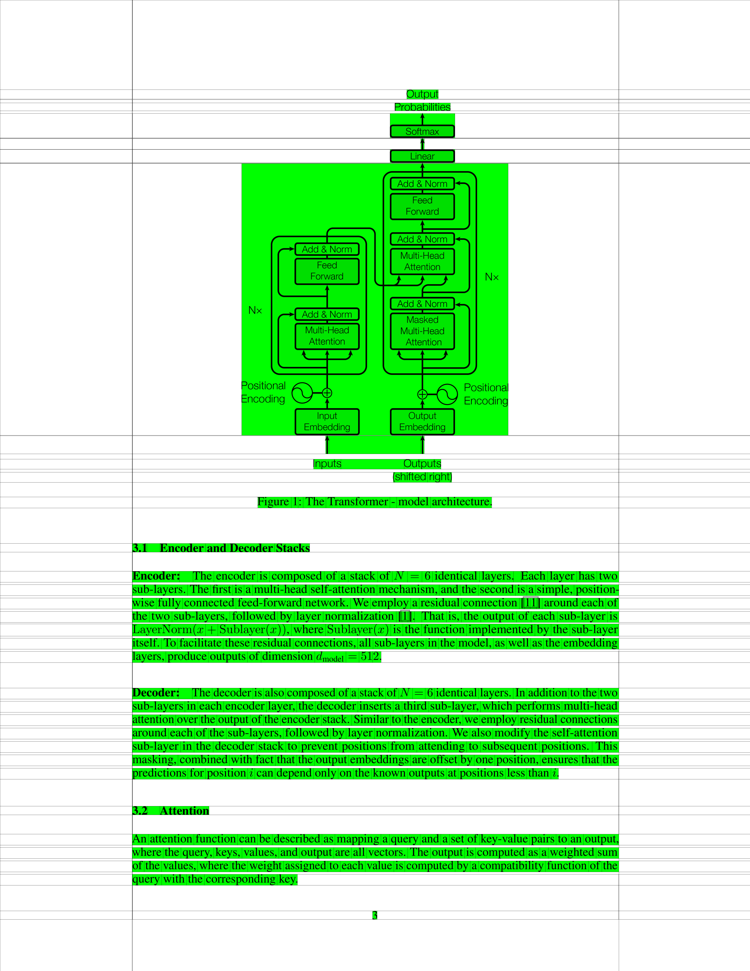

In [26]:
data4 = line_seg3(image_file2)
pil_image = Image.fromarray(data4)
pil_image = scale_to_width(pil_image, 750)

pil_image

In [36]:
def line_seg4(data_image):

# def line2(image_file):  
  data = np.array(data_image)
  original = data.copy()
  data_lined = data.copy()

  ver = []
  zero_ind = []
  tmp_ind = []
  f = 0
  max_score = len(data_lined[0])
  t = 0
  for i in range(len(data_lined)):
    score = np.count_nonzero(data_lined[i])
    ver.append(score)
    if score==max_score and f==0:
      zero_ind.append(i)
      f = 1
    elif score!=max_score and f==1:
      zero_ind.append(i-1)
      f = 0

  ver_h = []
  zero_ind_h = []
  tmp_ind = []
  f = 0
  max_score = len(data_lined[:,0])
  t = 0
  for i in range(len(data_lined[0])):
    score = np.count_nonzero(data_lined[:,i])
    ver_h.append(score)
    if score==max_score and f==0:
      zero_ind_h.append(i)
      f = 1
    elif score!=max_score and f==1:
      zero_ind_h.append(i-1)
      f = 0

      
  target = []
  x1 = 0
  x2 = len(data[0])
  for i in zero_ind_h:
    if i == 0 or i == len(data[0]):
      continue
    elif x1==0:
      x1 = i
    else: x2 = i 
  for i,j in zip(zero_ind,zero_ind[1:]):
    if j-i<= 20:continue
    else:target.append([i,j,x1,x2])
  # print(target)


  for i in zero_ind:
    data_lined[i] = 0
  for i in zero_ind_h:
    data_lined[:,i] = 0


  data = data_lined.copy()

  print(len(target),target)
  for y1,y2,x1,x2 in target:
    test_line = data[y1:y2,x1:x2]
    ver_h = []
    zero_ind_h = []
    tmp_ind = []
    f = 0
    max_score = len(test_line[:,0])
    freedom =1
    t = 0
    for i in range(len(test_line[0])):
      score = np.count_nonzero(test_line[:,i])
      ver_h.append(score)
      if score>= max_score - freedom  and f==0:
        tmp_ind.append(i)
        f = 1
      elif score < max_score - freedom and f==1:
        zero_ind_h.append([tmp_ind[-1],i,i-tmp_ind[-1]])
        f = 0
    if f:
        zero_ind_h.append([tmp_ind[-1],i,i-tmp_ind[-1]])

    for i,j,g in zero_ind_h:
      if g > 15:
        if g>= 50:
          test_line[:,i] = 0
          test_line[:,j] = 0
        else:
          test_line[:,(j+i)//2] = 0
  # return data



  original = np.array(data_image)
  pil_image = Image.fromarray(data)
  data_image_rgb = pil_image.convert("RGB")
  data = original.copy()
  rgb_data = np.array(data_image_rgb)

  red_target = []
  for y1,y2,x1,x2 in target:
    x1-=20
    x2+=20
    test_line = data[y1:y2,x1:x2]
    ver_h = []
    zero_ind_h = []
    tmp_ind = []
    f = 0
    max_score = len(test_line[:,0])
    freedom =1
    t = 0
    for i in range(len(test_line[0])):
      score = np.count_nonzero(test_line[:,i])
      ver_h.append(score)
      if score>= max_score - freedom  and f==0:
        tmp_ind.append(i)
        f = 1
      elif score < max_score - freedom and f==1:
        zero_ind_h.append([tmp_ind[-1],i,i-tmp_ind[-1]])
        f = 0
    if f:
        zero_ind_h.append([tmp_ind[-1],i,i-tmp_ind[-1]])

    for i,j,g in zero_ind_h:
      if g > 15:
        if g>= 50:
          test_line[:,i] = 0
          test_line[:,j] = 0
          red_target.append([y1,y2,x1,x2,i])
          red_target.append([y1,y2,x1,x2,j])
        else:
          test_line[:,(j+i)//2] = 0
          red_target.append([y1,y2,x1,x2,(j+i)//2])

  data = original.copy()
  r_data = rgb_data.copy()
  target_dic = []
  for i,j in zip(red_target,red_target[1:]):
    if i[:-1] == j[:-1]:
      if np.mean(data[i[0]:i[1],i[2]+i[-1]:i[2]+j[-1]]) <= 253: r_data[i[0]:i[1],i[2]+i[-1]:i[2]+j[-1],(1,2)] = 0 ; target_dic.append([i[0],i[1],i[2]+i[-1],i[2]+j[-1]])
      # else:r_data[i[0]:i[1],i[2]+i[-1]:i[2]+j[-1],(0,1)] = 0
    else:
      if np.mean(data[i[0]:i[1],i[2]+i[-1]:i[3]]) <= 253: r_data[i[0]:i[1],i[2]+i[-1]:i[3],(1,2)] = 0 ; target_dic.append([i[0],i[1],i[2]+i[-1],i[3]])
      # else: r_data[i[0]:i[1],i[2]+i[-1]:i[3],(0,2)] = 0

      if np.mean(data[j[0]:j[1],j[2]:j[2]+j[-1]]) <= 253: r_data[j[0]:j[1],j[2]:j[2]+j[-1],(1,2)] = 0 ; target_dic.append([j[0],j[1],j[2],j[2]+j[-1]])
      # else :r_data[j[0]:j[1],j[2]:j[2]+j[-1],(0,2)] = 0

  from collections import defaultdict
  check_dic = []
  d = defaultdict(list)
  b_seg_line = []

  for i in target_dic:
    d[i[0]].append(i)

  for i in d.keys():
    tmp_lis = d[i]
    b_seg_line.append([*tmp_lis[0][:2],tmp_lis[0][2],tmp_lis[-1][-1]])

  data = original.copy()
  r_data = rgb_data.copy()

  for i,j,k,l in b_seg_line:
    r_data[i:j,k:l,(0,2)] = 0



  check_dic = []
  d = defaultdict(list)
  b_seg_line = []

  for i in target_dic:
    d[i[0]].append(i)

  for i in d.keys():
    tmp_lis = d[i]
    b_seg_line.append([*tmp_lis[0][:2],tmp_lis[0][2],tmp_lis[-1][-1]])


  dd = defaultdict(list)
  b_seg_para = []

  before_y = 0
  count_index = 0
  for e,i in enumerate(b_seg_line):
    if i[0]-before_y >=50:
      count_index+=1
    
    dd[count_index].append(i)
    before_y = i[1]
      

  for i in dd.keys():
    tmp_lis = dd[i]
    min_x = float("INF")
    max_x = 0 
    for i in tmp_lis:
      min_x = min(min_x,i[2])
      max_x = max(max_x,i[3])
    b_seg_para.append([tmp_lis[0][0],tmp_lis[-1][1],min_x,max_x])

  data = original.copy()
  r_data = rgb_data.copy()

  for e,(i,j,k,l) in enumerate(b_seg_para):
    if e%2==0 :r_data[i:j,k:l,(0,2)] = 0
    else : r_data[i:j,k:l,(1,2)] = 0

  return r_data

42 [[0, 609, 898, 4208], [609, 673, 898, 4208], [677, 699, 898, 4208], [699, 753, 898, 4208], [771, 937, 898, 4208], [942, 1015, 898, 4208], [1016, 1106, 898, 4208], [1111, 2959, 898, 4208], [2962, 3085, 898, 4208], [3085, 3121, 898, 4208], [3121, 3189, 898, 4208], [3189, 3210, 898, 4208], [3210, 3279, 898, 4208], [3279, 3378, 898, 4208], [3378, 3453, 898, 4208], [3453, 3694, 898, 4208], [3694, 3753, 898, 4208], [3753, 3883, 898, 4208], [3883, 3958, 898, 4208], [3974, 4049, 898, 4208], [4065, 4140, 898, 4208], [4156, 4231, 898, 4208], [4241, 4324, 898, 4208], [4338, 4413, 898, 4208], [4428, 4504, 898, 4208], [4504, 4677, 898, 4208], [4677, 4752, 898, 4208], [4767, 4842, 898, 4208], [4858, 4933, 898, 4208], [4949, 5024, 898, 4208], [5040, 5115, 898, 4208], [5131, 5206, 898, 4208], [5222, 5297, 898, 4208], [5297, 5480, 898, 4208], [5480, 5539, 898, 4208], [5539, 5670, 898, 4208], [5670, 5745, 898, 4208], [5761, 5836, 898, 4208], [5852, 5927, 898, 4208], [5943, 6018, 898, 4208], [6018, 61

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


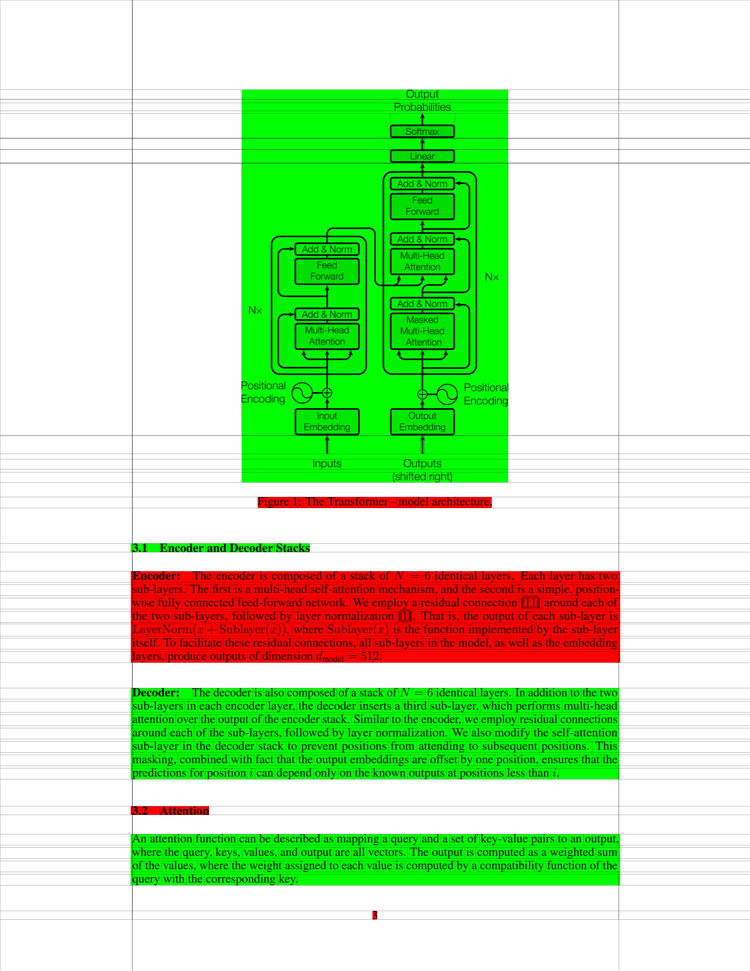

In [37]:
data4 = line_seg4(image_file2)
pil_image = Image.fromarray(data4)
pil_image = scale_to_width(pil_image, 750)

pil_image

In [38]:
data1 = line_seg4(image_file1)
data2 = line_seg4(image_file2)
data3 = line_seg4(image_file3)
data4 = line_seg4(image_file4)
data5 = line_seg4(image_file5)
data6 = line_seg4(image_file6)
data7 = line_seg4(image_file7)
data8 = line_seg4(image_file8)
data9 = line_seg4(image_file9)

im_rgb1 = np.concatenate((data1,data2,data3),axis = 1)
im_rgb2 = np.concatenate((data4,data5,data6),axis = 1)
im_rgb3 = np.concatenate((data7,data8,data9),axis = 1)

im_rgb = np.concatenate((im_rgb1,im_rgb2,im_rgb3))

63 [[0, 626, 898, 4209], [626, 701, 898, 4209], [716, 791, 898, 4209], [807, 877, 898, 4209], [877, 944, 898, 4209], [944, 1019, 898, 4209], [1035, 1110, 898, 4209], [1125, 1201, 898, 4209], [1217, 1292, 898, 4209], [1308, 1383, 898, 4209], [1398, 1473, 898, 4209], [1489, 1564, 898, 4209], [1580, 1655, 898, 4209], [1655, 1717, 898, 4209], [1717, 1792, 898, 4209], [1808, 1883, 898, 4209], [1899, 1974, 898, 4209], [1990, 2065, 898, 4209], [2065, 2126, 898, 4209], [2126, 2201, 898, 4209], [2217, 2292, 898, 4209], [2308, 2383, 898, 4209], [2399, 2474, 898, 4209], [2474, 2667, 898, 4209], [2667, 2756, 898, 4209], [2756, 2898, 898, 4209], [2898, 2973, 898, 4209], [2988, 3062, 898, 4209], [3079, 3154, 898, 4209], [3170, 3245, 898, 4209], [3261, 3336, 898, 4209], [3352, 3427, 898, 4209], [3443, 3518, 898, 4209], [3534, 3609, 898, 4209], [3625, 3682, 898, 4209], [3682, 3761, 898, 4209], [3761, 3836, 898, 4209], [3852, 3927, 898, 4209], [3943, 4018, 898, 4209], [4034, 4109, 898, 4209], [4109, 41

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


42 [[0, 609, 898, 4208], [609, 673, 898, 4208], [677, 699, 898, 4208], [699, 753, 898, 4208], [771, 937, 898, 4208], [942, 1015, 898, 4208], [1016, 1106, 898, 4208], [1111, 2959, 898, 4208], [2962, 3085, 898, 4208], [3085, 3121, 898, 4208], [3121, 3189, 898, 4208], [3189, 3210, 898, 4208], [3210, 3279, 898, 4208], [3279, 3378, 898, 4208], [3378, 3453, 898, 4208], [3453, 3694, 898, 4208], [3694, 3753, 898, 4208], [3753, 3883, 898, 4208], [3883, 3958, 898, 4208], [3974, 4049, 898, 4208], [4065, 4140, 898, 4208], [4156, 4231, 898, 4208], [4241, 4324, 898, 4208], [4338, 4413, 898, 4208], [4428, 4504, 898, 4208], [4504, 4677, 898, 4208], [4677, 4752, 898, 4208], [4767, 4842, 898, 4208], [4858, 4933, 898, 4208], [4949, 5024, 898, 4208], [5040, 5115, 898, 4208], [5131, 5206, 898, 4208], [5222, 5297, 898, 4208], [5297, 5480, 898, 4208], [5480, 5539, 898, 4208], [5539, 5670, 898, 4208], [5670, 5745, 898, 4208], [5761, 5836, 898, 4208], [5852, 5927, 898, 4208], [5943, 6018, 898, 4208], [6018, 61

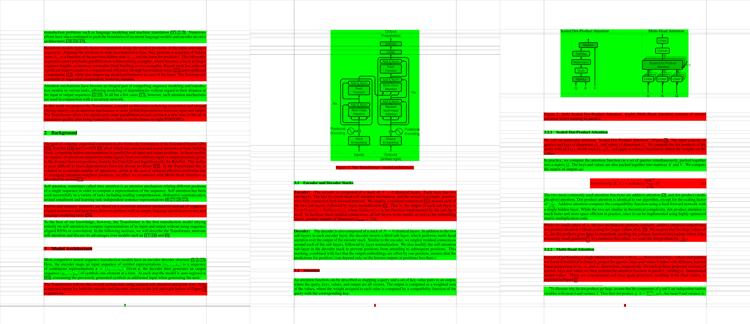

In [39]:
# data4 = line_seg4(image_file2)
pil_image = Image.fromarray(im_rgb1)
pil_image = scale_to_width(pil_image, 750)

pil_image

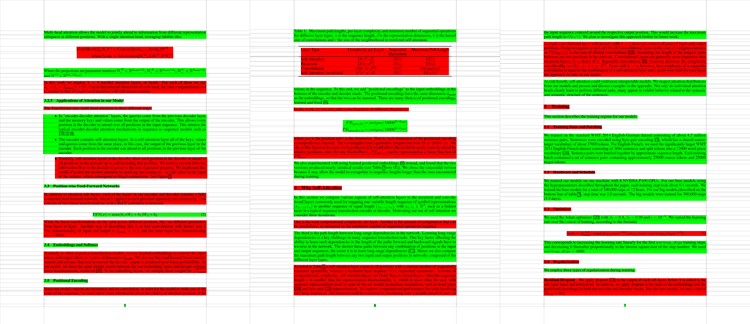

In [45]:
# data4 = line_seg4(image_file2)
pil_image = Image.fromarray(im_rgb2)
pil_image = scale_to_width(pil_image, 750)

pil_image

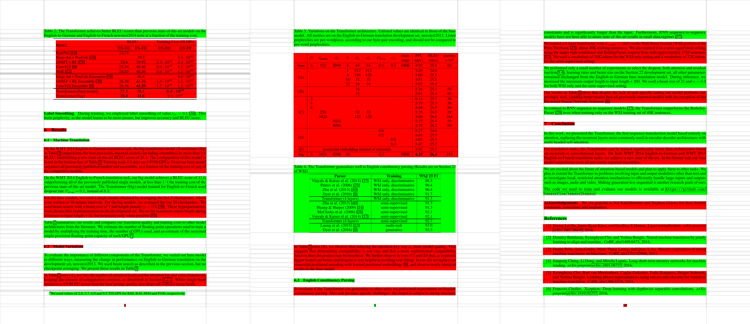

In [46]:
# data4 = line_seg4(image_file2)
pil_image = Image.fromarray(im_rgb3)
pil_image = scale_to_width(pil_image, 750)

pil_image

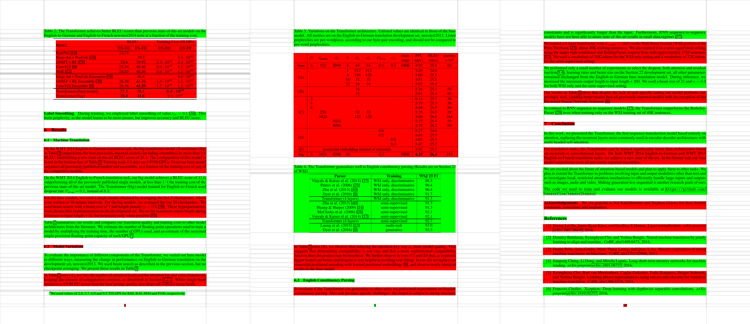

In [47]:
# data4 = line_seg4(image_file2)
pil_image = Image.fromarray(im_rgb3)
pil_image = scale_to_width(pil_image, 750)
pil_image

In [48]:
data8 = line_seg4(image_file8)
pil_image = scale_to_width(pil_image, 750)
pil_image = Image.fromarray(data8)

26 [[0, 599, 898, 4239], [599, 657, 898, 4239], [657, 690, 898, 4239], [690, 765, 898, 4239], [781, 856, 898, 4239], [872, 947, 898, 4239], [947, 1080, 898, 4239], [1080, 3203, 898, 4239], [3203, 3364, 898, 4239], [3364, 3439, 898, 4239], [3455, 3521, 898, 4239], [3546, 4739, 898, 4239], [4739, 4992, 898, 4239], [4992, 5068, 898, 4239], [5084, 5159, 898, 4239], [5175, 5250, 898, 4239], [5266, 5341, 898, 4239], [5357, 5432, 898, 4239], [5448, 5505, 898, 4239], [5505, 5675, 898, 4239], [5675, 5750, 898, 4239], [5750, 5852, 898, 4239], [5852, 5927, 898, 4239], [5943, 6018, 898, 4239], [6018, 6192, 898, 4239], [6192, 6250, 898, 4239]]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


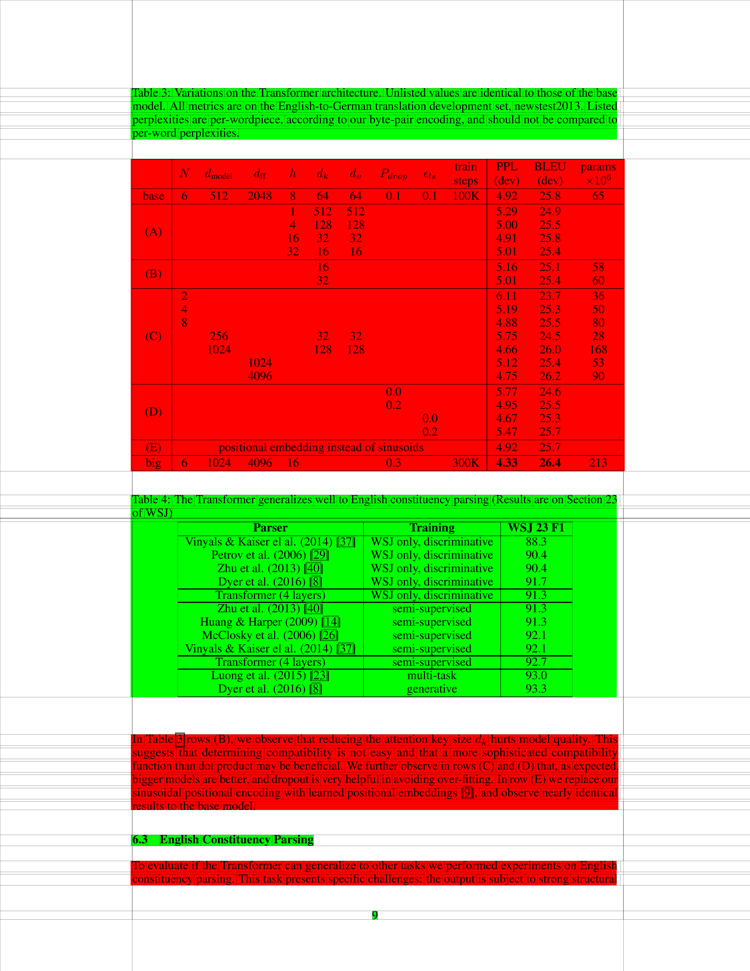

In [49]:
pil_image = scale_to_width(pil_image, 750)
pil_image